# Korea's economy

#### Import libraries

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt



#### import data

In [19]:
raw_data=pd.read_excel(r'C:\Users\mohamed.chadqui\Documents\Python Scripts\Analysis\Linear Regression\\korea_data.xlsx')
raw_data.head()


,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
2,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
3,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
4,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


### Explore data

In [20]:
raw_data.describe()

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1993.00000,7.194243,32.405530,1.045240,20.113930,5.758657,5.378513,8.988990,5.812430,3.678543
std,14.28869,4.208579,4.098204,0.516525,14.757234,3.615251,2.610390,12.498723,4.209459,0.958478
min,1969.00000,-5.471219,21.404761,0.211998,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,1981.00000,3.923677,29.943577,0.577957,9.885949,2.981150,3.387772,2.417118,2.900586,3.167300
50%,1993.00000,7.432434,32.248290,0.985130,17.174170,6.523265,5.031057,7.566111,6.853033,3.700000
75%,2005.00000,10.353951,34.455668,1.519197,26.894645,8.168925,7.158110,15.948873,8.927295,4.068000
max,2017.00000,14.827554,41.374062,2.263434,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000


In [21]:
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}
data=raw_data.rename(columns=column_names)
data.head()

#year can be set as an index as every raw is for a specific year
data=data.set_index('Year')

data['birth_rate']=data['birth_rate'].replace(to_replace="..", value='NaN')

data

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [22]:
#check for no value data
data.isnull().any()

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

In [23]:
data=data.astype(float)
data=data[data['birth_rate']<2017]
data

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


### Check for multi collinearity

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


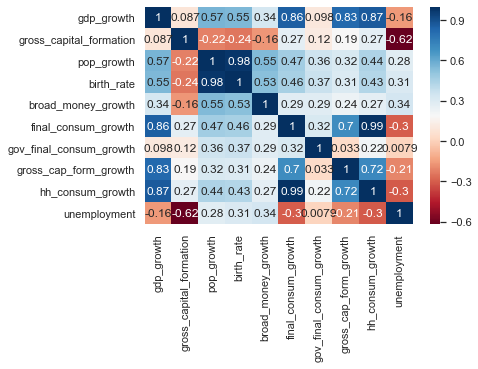

In [24]:
# calculate the correlation matrix
corr = data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu',annot=True)

##Drop candidates
#birth_rate 
#final_consum_growth


In [25]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[data.columns]
variables=sm.tools.add_constant(variables)
vif = pd.DataFrame()
 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif=vif[['features','VIF']]
vif

C:\Users\mohamed.chadqui\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,features,VIF
0,const,314.550195
1,gdp_growth,9.807879
2,gross_capital_formation,2.430057
3,pop_growth,25.759263
4,birth_rate,26.174368
5,broad_money_growth,1.633079
6,final_consum_growth,2305.724583
7,gov_final_consum_growth,32.527332
8,gross_cap_form_growth,3.796420
9,hh_consum_growth,2129.093634


In [26]:
#gross_capital_formation is a component of GDP
#birth rate and pop growth are pratically the same things as the country didn't have a cause for variation of deaths between 1969 and 2016

data_uncorr=data.drop(['gdp_growth','pop_growth','final_consum_growth'],axis=1)

variables = data_uncorr[data_uncorr.columns]
variables=sm.tools.add_constant(variables)
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif=vif[['features','VIF']]
vif

,features,VIF
0,const,196.544387
1,gross_capital_formation,1.753566
2,birth_rate,2.100028
3,broad_money_growth,1.564215
4,gov_final_consum_growth,1.301888
5,gross_cap_form_growth,2.146178
6,hh_consum_growth,2.831422
7,unemployment,2.112312


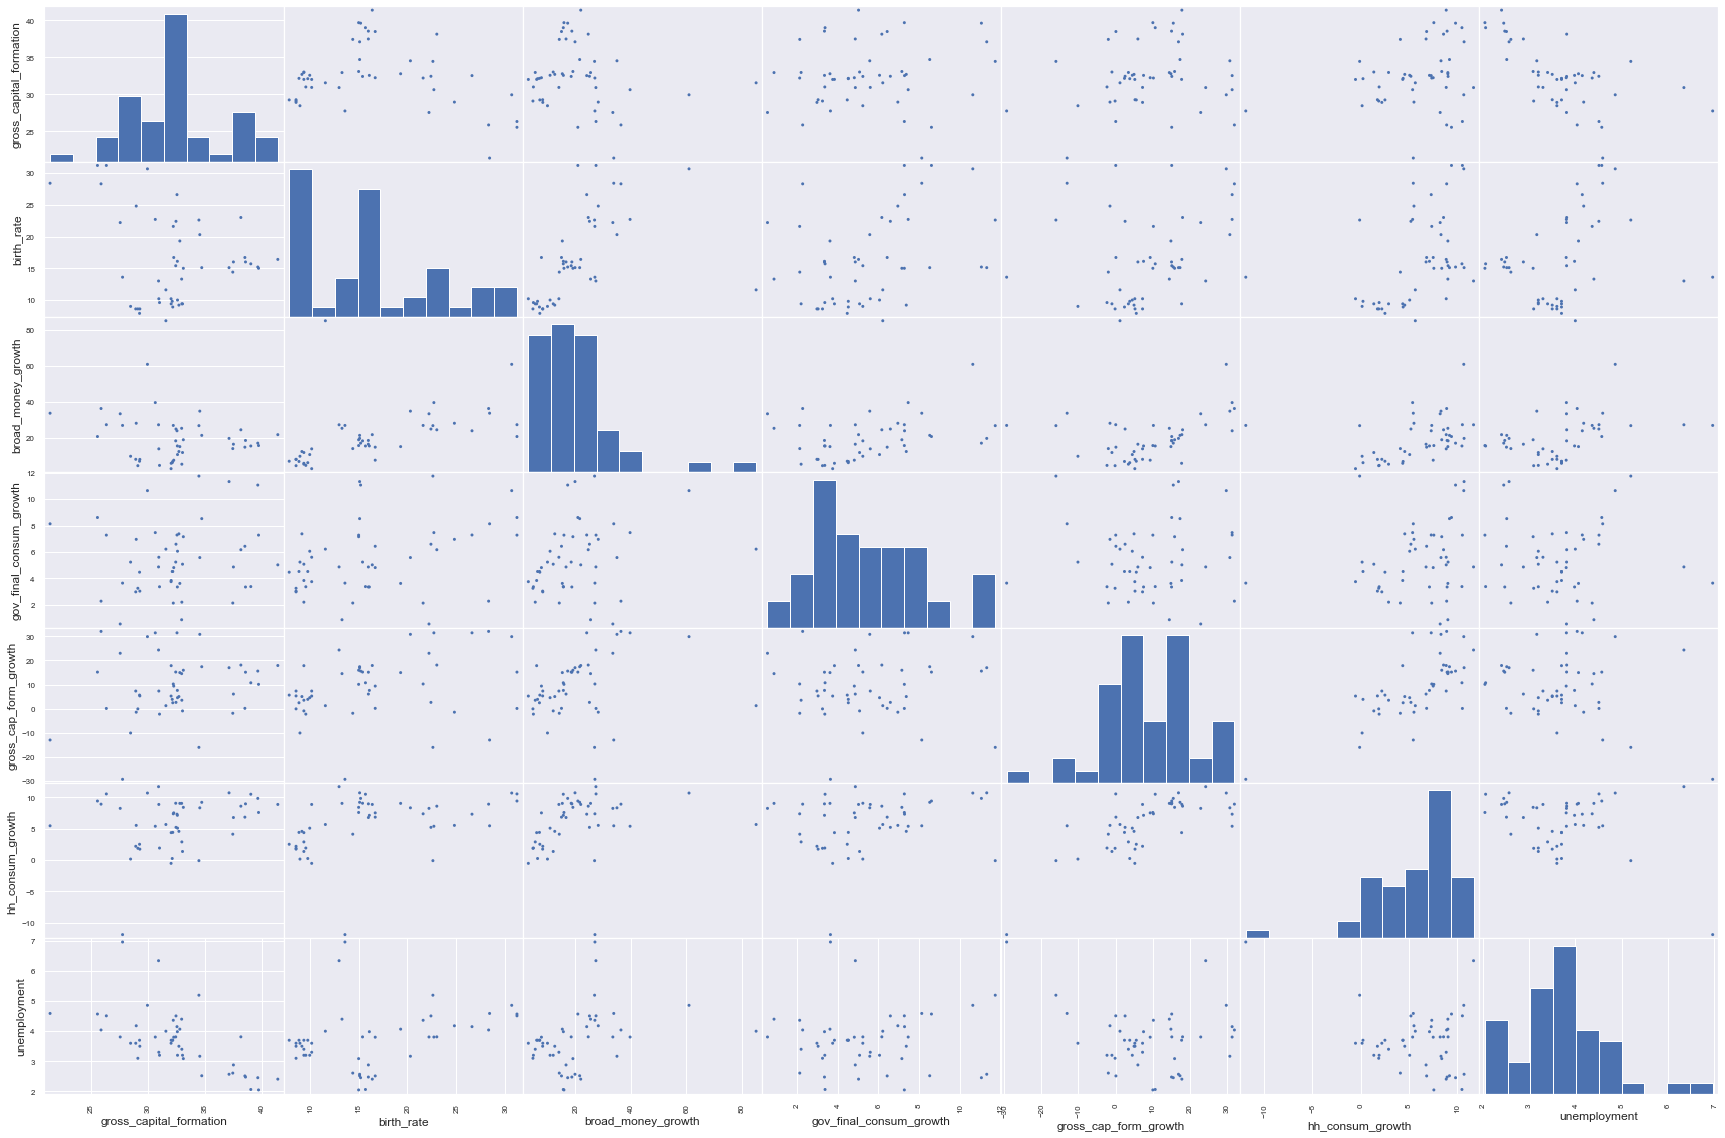

In [27]:

# define the plot
pd.plotting.scatter_matrix(data_uncorr, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [28]:
description=data_uncorr.describe()

description.loc['+3std']=description.loc['mean'] + 3*description.loc['std']
description.loc['-3std']=description.loc['mean'] - 3*description.loc['std']


description
##Potential outlayers
#broad_money_growth
#unemployment

,gross_capital_formation,birth_rate,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,32.433236,16.340896,20.426621,5.419214,8.965681,5.879176,3.678096
std,4.136932,6.814683,14.748442,2.622254,12.629912,4.227720,0.968616
min,21.404761,7.900000,2.980690,0.560957,-29.403255,-11.894309,2.048000
25%,29.776910,9.950000,10.586461,3.384407,2.114078,3.825773,3.150475
50%,32.335229,15.150000,17.807598,5.056509,7.431966,6.999971,3.700000
75%,34.474874,21.750000,26.923837,7.188470,16.210283,8.938837,4.088500
max,41.374062,31.200000,85.203081,11.742807,32.098276,11.711835,6.963000
+3std,44.844034,36.784945,64.671947,13.285976,46.855416,18.562336,6.583944
-3std,20.022439,-4.103153,-23.818705,-2.447547,-28.924054,-6.803985,0.772247


In [29]:
#remove outliers
from scipy import stats

# filter the data frame to remove the values exceeding 3 standard deviations
data_remove_OL = data_uncorr[(np.abs(stats.zscore(data_uncorr)) < 3).all(axis=1)]

# what rows were removed
data_uncorr.index.difference(data_remove_OL.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

In [30]:
Data=data.drop(['pop_growth','final_consum_growth'], axis=1)

y=Data['gdp_growth']
x=Data.drop('gdp_growth',axis=1)


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


# create a Linear Regression model object
reg = LinearRegression()

# pass through the X_train & y_train data set
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
intercept=reg.intercept_
coeff=reg.coef_
coeff
summary=pd.DataFrame(x.columns.values,columns=['Feature'])
summary['Weight']=coeff

display('the intercept is : ' , intercept)
summary

'the intercept is : '

5.504398919380608

,Feature,Weight
0,gross_capital_formation,-0.094162
1,birth_rate,0.148157
2,broad_money_growth,-0.001619
3,gov_final_consum_growth,-0.187685
4,gross_cap_form_growth,0.129286
5,hh_consum_growth,0.535001
6,unemployment,-0.200997


In [33]:

# Get multiple predictions
y_predict = reg.predict(X_test)

# Show the first 5 predictions
y_predict[:5]




array([ 8.05863386,  6.29750691,  5.43311482,  4.86602238, 12.15694213])

## Evaluating the model

In [34]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

C:\Users\mohamed.chadqui\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Heteroscedasticity  

In [36]:
from statsmodels.stats import diagnostic as diag
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.4651065583488504 0.5914855192869639
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4651
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.4387414060342302 0.4727861161776883
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.4387
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


The number of lags will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1652
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


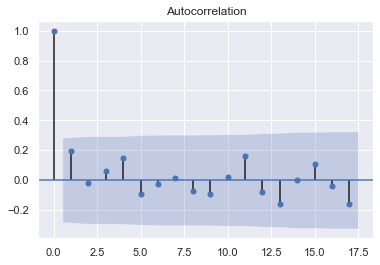

In [37]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

## Chacking for normally distributed residuals

### Checking the Mean of the Residuals Equals 0

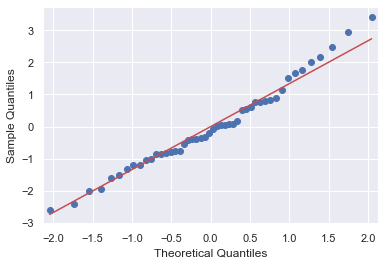

The mean of the residuals is -9.742e-15


In [38]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### Measures of Error

In [39]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.694
MAE 0.667
RMSE 0.833


In [40]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.87


### confidence interval

In [41]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,-0.759301,11.211212
gross_capital_formation,-0.223774,0.052435
birth_rate,0.061419,0.244912
broad_money_growth,-0.032787,0.040387
gov_final_consum_growth,-0.364886,0.010576
gross_cap_form_growth,0.080036,0.180125
hh_consum_growth,0.334835,0.678275
unemployment,-0.900741,0.393996


### Hypothesis Testing


In [42]:

# estimate the p-values
est.pvalues

const                      8.525297e-02
gross_capital_formation    2.172207e-01
birth_rate                 1.656142e-03
broad_money_growth         8.347983e-01
gov_final_consum_growth    6.369169e-02
gross_cap_form_growth      5.264334e-06
hh_consum_growth           5.345964e-07
unemployment               4.335943e-01
dtype: float64

### Create a Summary of the Model Output


In [44]:
# print out a summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     49.83
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           9.04e-18
Time:                        12:39:12   Log-Likelihood:                -82.013
No. Observations:                  48   AIC:                             180.0
Df Residuals:                      40   BIC:                             195.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.2260      2.961      1.765      0.085      -0.759      11.211
gross_capital_formation    -0.0857      0.068     -1.254      0.217      -0.224       0.052
birth_rate                  0.1532      0.045      3.374      0.002       0.061       0.245
broad_money_growth          0.0038      0.018      0.210      0.835      -0.033       0.040
gov_final_consum_growth    -0.1772      0.093     -1.907      0.064      -0.365       0.011
gross_cap_form_growth       0.1301      0.025      5.253      0.000       0.080       0.180
hh_consum_growth            0.5066      0.085      5.962      0.000       0.335       0.678
unemployment               -0.2534      0.320     -0.791      0.434      -0.901       0.394
==============================================================================
Omnibus:                        2.029   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.654
Skew:                           0.453   Prob(JB):                        0.437
Kurtosis:                       2.931   Cond. No.                         630.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:

# define our input variable (X) & output variable
data_after = Data.drop(['broad_money_growth','gross_capital_formation','unemployment'], axis = 1)

X = data_after.drop('gdp_growth', axis = 1)
Y = data_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

est.summary()

C:\Users\mohamed.chadqui\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     89.63
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.79e-20
Time:                        12:48:07   Log-Likelihood:                -82.976
No. Observations:                  48   AIC:                             176.0
Df Residuals:                      43   BIC:                             185.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5639      0.611      2.558      0.014       0.331       2.797
birth_rate                  0.1629      0.036      4.525      0.000       0.090       0.235
gov_final_consum_growth    -0.1956      0.088     -2.222      0.032      -0.373      -0.018
gross_cap_form_growth       0.1294      0.024      5.341      0.000       0.081       0.178
hh_consum_growth            0.5026      0.076      6.603      0.000       0.349       0.656
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.059
Skew:                           0.363   Prob(JB):                        0.589
Kurtosis:                       3.044   Cond. No.                         67.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""